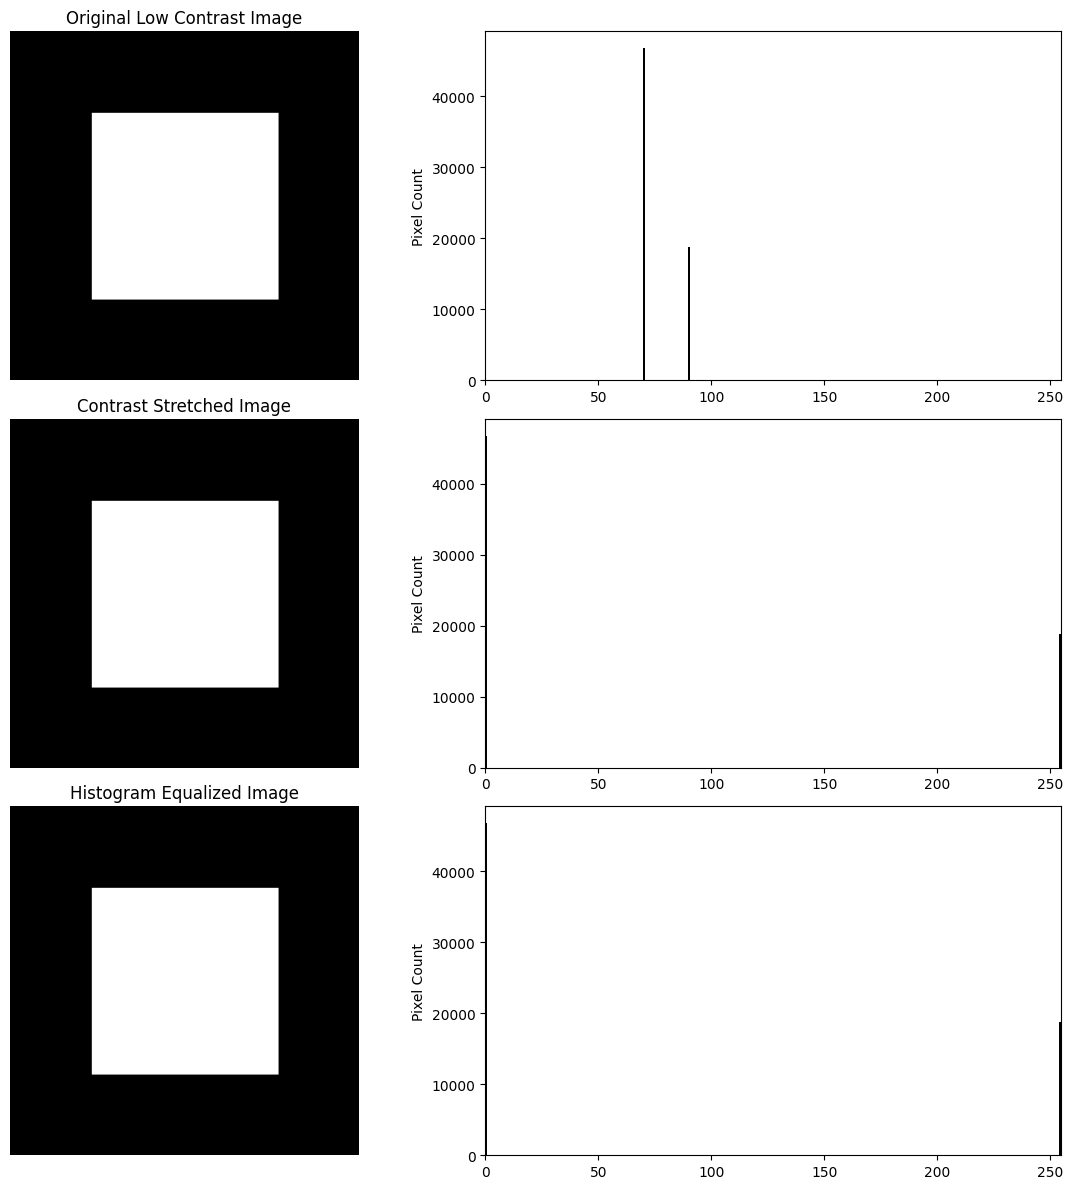

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic low contrast image (a dark gray rectangle with slight variation)
img = np.full((256, 256), 70, dtype=np.uint8)  # dark gray image
cv2.rectangle(img, (60, 60), (196, 196), 90, -1)  # slightly brighter rectangle

def plot_image_and_histogram(img, title, ax_img, ax_hist):
    ax_img.imshow(img, cmap='gray')
    ax_img.set_title(title)
    ax_img.axis('off')
    ax_hist.hist(img.ravel(), bins=256, range=(0, 255), color='black')
    ax_hist.set_xlim([0, 255])
    ax_hist.set_ylabel('Pixel Count')

# Contrast Stretching function
def contrast_stretching(image):
    in_min = np.min(image)
    in_max = np.max(image)
    out_min = 0
    out_max = 255
    stretched = (image - in_min) * ((out_max - out_min) / (in_max - in_min)) + out_min
    return stretched.astype(np.uint8)

# Histogram Equalization function
def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Apply contrast stretching
contrast_stretched = contrast_stretching(img)

# Apply histogram equalization
hist_eq = histogram_equalization(img)

# Plot all results
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

plot_image_and_histogram(img, 'Original Low Contrast Image', axes[0, 0], axes[0, 1])
plot_image_and_histogram(contrast_stretched, 'Contrast Stretched Image', axes[1, 0], axes[1, 1])
plot_image_and_histogram(hist_eq, 'Histogram Equalized Image', axes[2, 0], axes[2, 1])

plt.tight_layout()
plt.show()
